In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('groceries_dataset.csv')

In [43]:
print("Head of DataFrame")
display(df.head())

Head of DataFrame


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [45]:
print("DataFrame Info")
df.info()

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [47]:
print("Missing Values")
display(df.isnull().sum())

Missing Values


Member_number      0
Date               0
itemDescription    0
dtype: int64

In [77]:
# Grouping items by Transaction ID
transactions = df.groupby('Transaction')['itemDescription'].apply(list)

# Displaying the first 5 grouped transactions
print("Grouped Transactions (first 5):")
print(transactions.head())

Grouped Transactions (first 5):
Transaction
1000_15-03-2015    [sausage, whole milk, semi-finished bread, yog...
1000_24-06-2014                    [whole milk, pastry, salty snack]
1000_24-07-2015                       [canned beer, misc. beverages]
1000_25-11-2015                          [sausage, hygiene articles]
1000_27-05-2015                           [soda, pickled vegetables]
Name: itemDescription, dtype: object


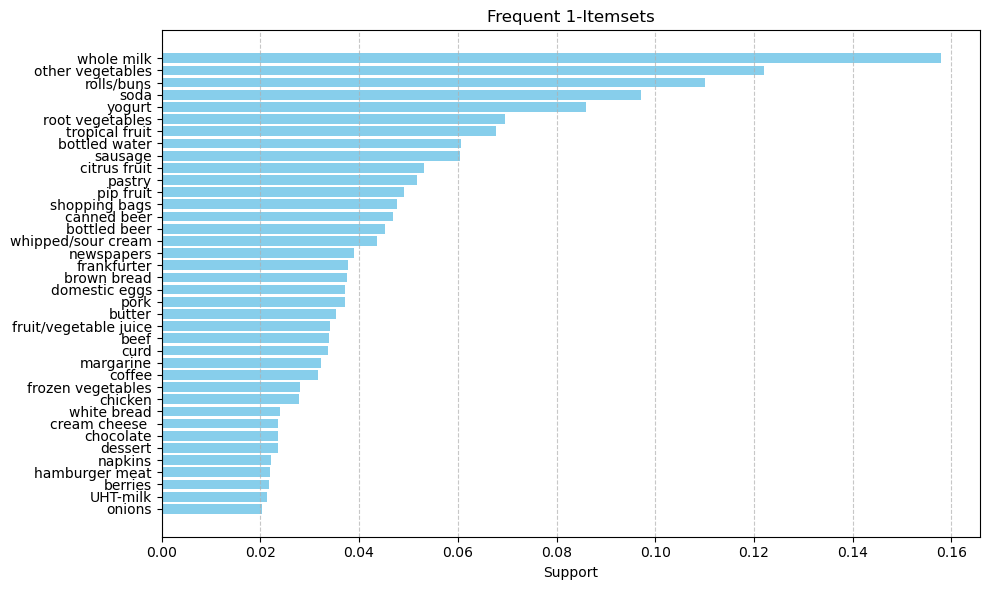

In [57]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Set minimum support threshold
min_support = 0.02
num_transactions = len(transactions)

# Count support for 1-itemsets
item_counts = defaultdict(int)

for transaction in transactions:
    unique_items = set(transaction)
    for item in unique_items:
        item_counts[item] += 1

# Compute support and filter by threshold
frequent_itemsets_1 = {item: count / num_transactions for item, count in item_counts.items() if (count / num_transactions) >= min_support}
frequent_itemsets_1 = dict(sorted(frequent_itemsets_1.items(), key=lambda x: x[1], reverse=True))

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(list(frequent_itemsets_1.keys()), list(frequent_itemsets_1.values()), color='skyblue')
plt.xlabel("Support")
plt.title("Frequent 1-Itemsets")
plt.gca().invert_yaxis()  # Highest support on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Top Association Rules (A → B):


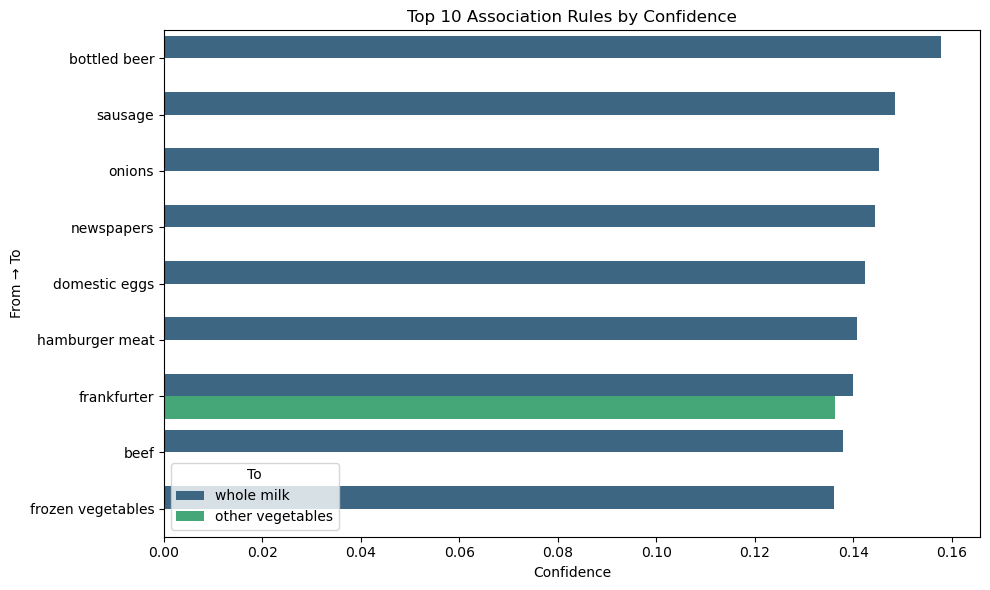

In [85]:
from itertools import combinations

# Minimum thresholds
min_support = 0.002
min_confidence = 0.1

# Step 1: Count 2-itemset occurrences
pair_counts = defaultdict(int)

for transaction in transactions:
    unique_items = set(transaction)
    for pair in combinations(sorted(unique_items), 2):
        pair_counts[pair] += 1

# Step 2: Filter by support
frequent_2_itemsets = {
    pair: count / num_transactions
    for pair, count in pair_counts.items()
    if (count / num_transactions) >= min_support
}

# Step 3: Generate rules with confidence
association_rules = []

for (A, B), support_AB in frequent_2_itemsets.items():
    support_A = frequent_itemsets_1.get(A, 0)
    support_B = frequent_itemsets_1.get(B, 0)
    
    if support_A > 0:
        confidence_A_to_B = support_AB / support_A
        if confidence_A_to_B >= min_confidence:
            association_rules.append((A, B, support_AB, confidence_A_to_B))
            
    if support_B > 0:
        confidence_B_to_A = support_AB / support_B
        if confidence_B_to_A >= min_confidence:
            association_rules.append((B, A, support_AB, confidence_B_to_A))

# Step 4: Sort by confidence descending
association_rules = sorted(association_rules, key=lambda x: x[3], reverse=True)

# Step 5: Display top 10 rules
print("Top Association Rules (A → B):")
for rule in association_rules[:10]:
    A, B, support, confidence = rule

# Step 6: Visualization
import seaborn as sns

# Prepare data for plotting
top_rules_df = pd.DataFrame(association_rules[:10], columns=['From', 'To', 'Support', 'Confidence'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Confidence', y='From', hue='To', data=top_rules_df, palette='viridis')
plt.title("Top 10 Association Rules by Confidence")
plt.xlabel("Confidence")
plt.ylabel("From → To")
plt.legend(title='To')
plt.tight_layout()
plt.show()
